DATA LOADING AND CLEANING


In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

In [99]:
df=pd.read_csv("heart.csv")

In [100]:
df.shape

(918, 12)

In [101]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [102]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [104]:
pd.isnull(df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [105]:
pd.isnull(df).sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [106]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


EXPLORATORY DATA ANALYSIS

In [107]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

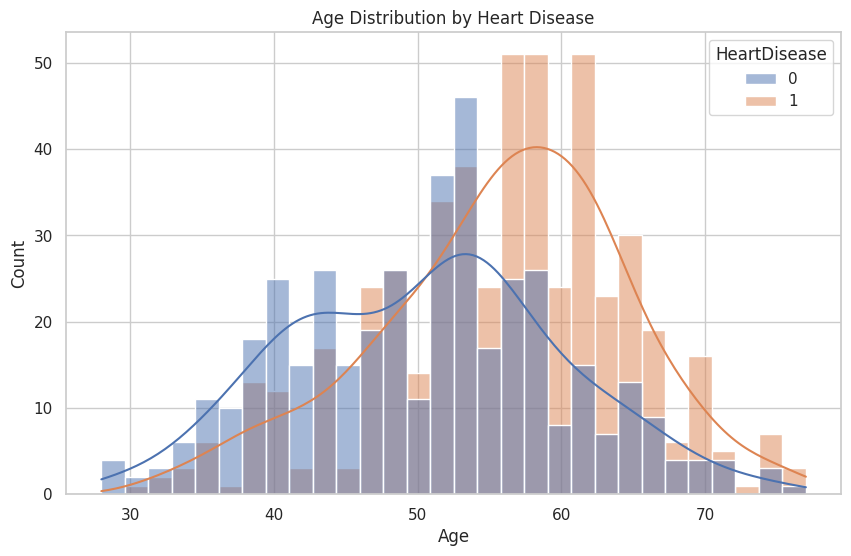

In [108]:
#AGE V HEART DISEASE
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, bins=30)
plt.title("Age Distribution by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

From here we can see that the senior citizens people of age-group 55-above are more prone to heart disease

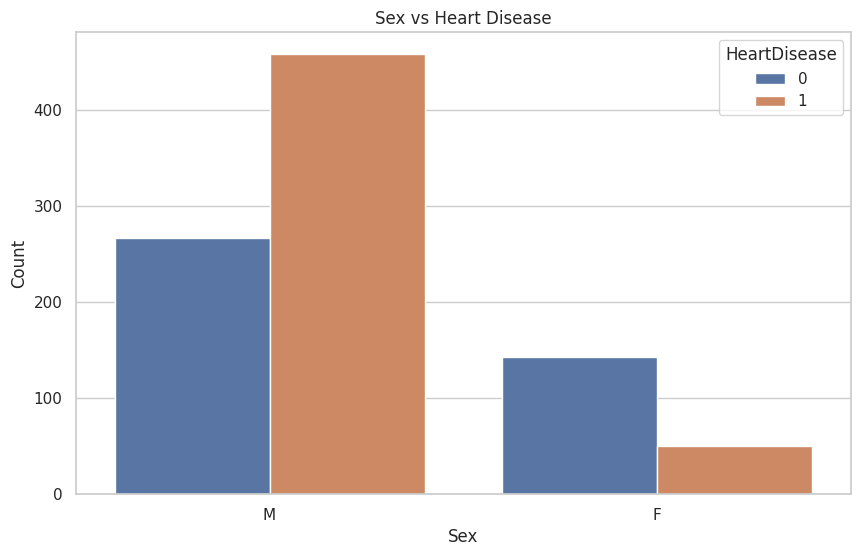

In [109]:
#SEX V HEART DISEASE
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title("Sex vs Heart Disease")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

From this chart we can see that the males are more prone to get heart disease.

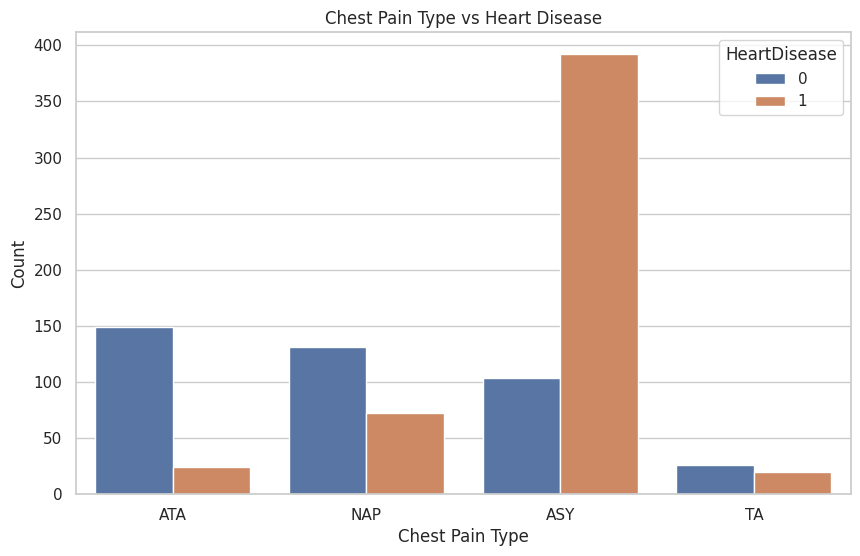

In [110]:
#CHEST PAIN TYPE V HEART DISEASE
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

From this graph we can see that "ASY" type of chest pain is an indicator of underlying heart disease

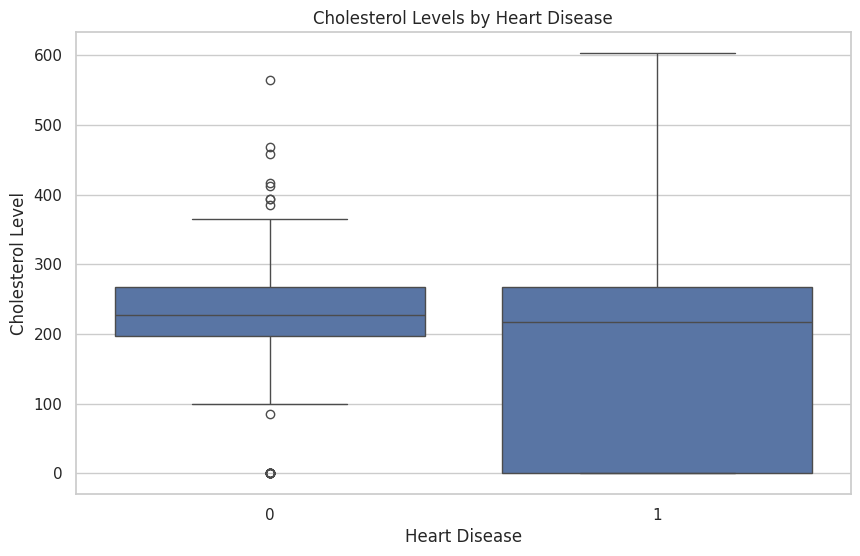

In [111]:
#COLESTEROL LEVEL V HEART DISEASE
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title("Cholesterol Levels by Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol Level")
plt.show()

People with heart disease (1) show a much wider variation in cholesterol levels, including very high and very low extremes.

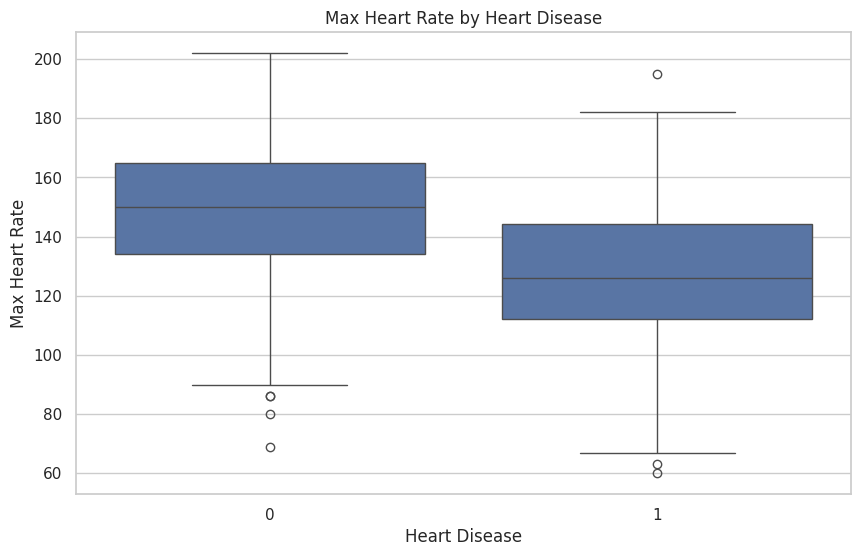

In [112]:
#MAX HEARTRATE V HEART DISEASE
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(x='HeartDisease', y='MaxHR', data=df)
plt.title("Max Heart Rate by Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Max Heart Rate")
plt.show()

Individuals without heart disease tend to achieve higher maximum heart rates, while those with heart disease generally have lower peak heart rates.
This suggests that reduced exercise capacity or lower stress endurance may be an indicator of heart disease.

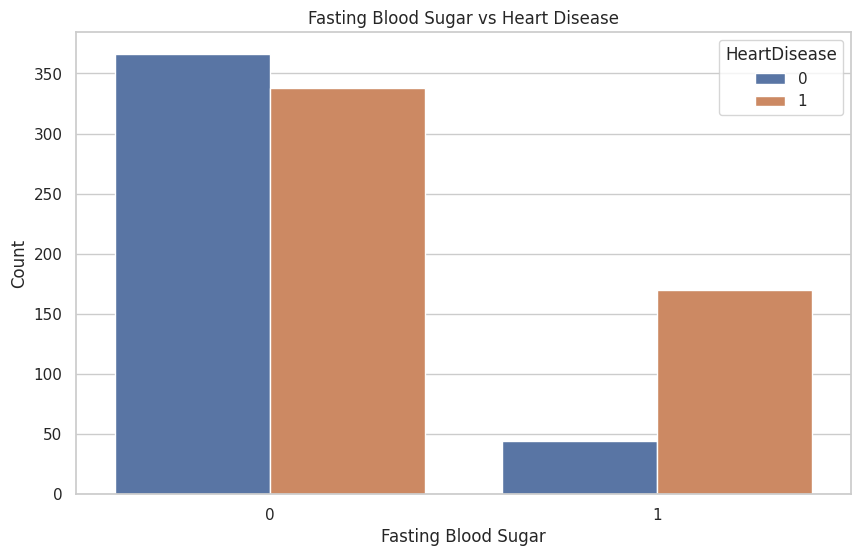

In [113]:
# FASTING BLOOD SUGAR V HEART DISEASE
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x='FastingBS', hue='HeartDisease', data=df)
plt.title("Fasting Blood Sugar vs Heart Disease")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Count")
plt.show()

Individuals with high fasting blood sugar levels (>120 mg/dL) are more likely to have heart disease.
This aligns with medical evidence that high blood sugar is a cardiovascular risk factor.

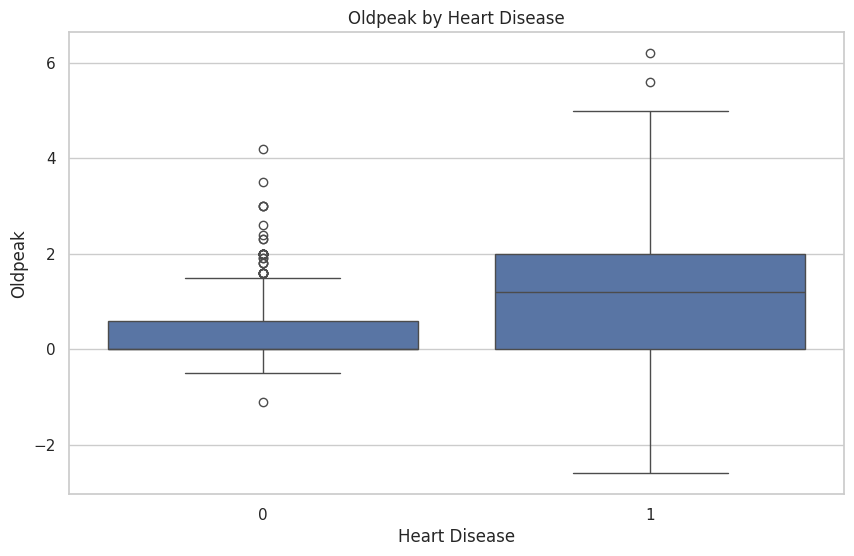

In [114]:
# OLD PEAK V HEART DISEASE
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(x='HeartDisease', y='Oldpeak', data=df)
plt.title("Oldpeak by Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Oldpeak")
plt.show()

Higher Oldpeak values (i.e., greater ST depression) are associated with heart disease.
This aligns with clinical findings, as ST depression during stress testing often indicates ischemia or reduced blood flow to the heart.

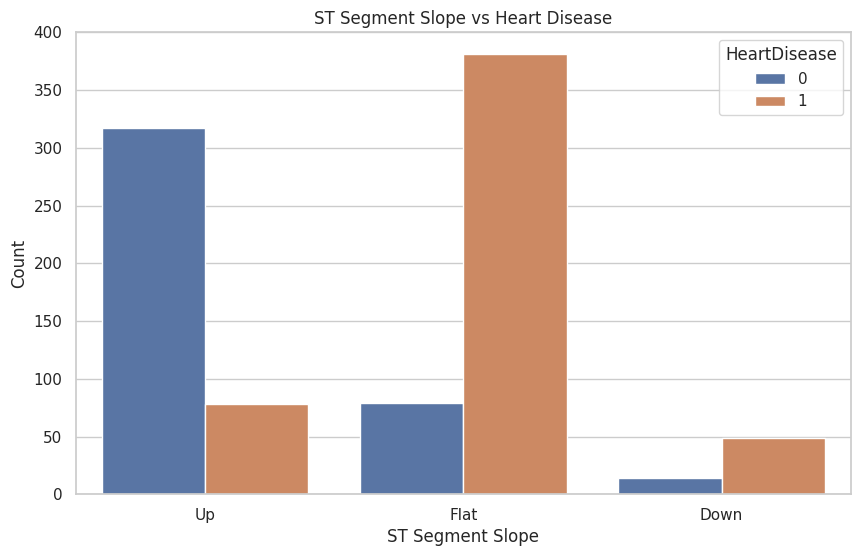

In [115]:
# ST SLOPE V HEART DISEASE
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df)
plt.title("ST Segment Slope vs Heart Disease")
plt.xlabel("ST Segment Slope")
plt.ylabel("Count")
plt.show()

Patients with a flat ST segment slope show the highest association with heart disease, while an upward slope is most common in those without heart disease. This makes ST slope a strong predictor in classification

<Figure size 1800x600 with 0 Axes>

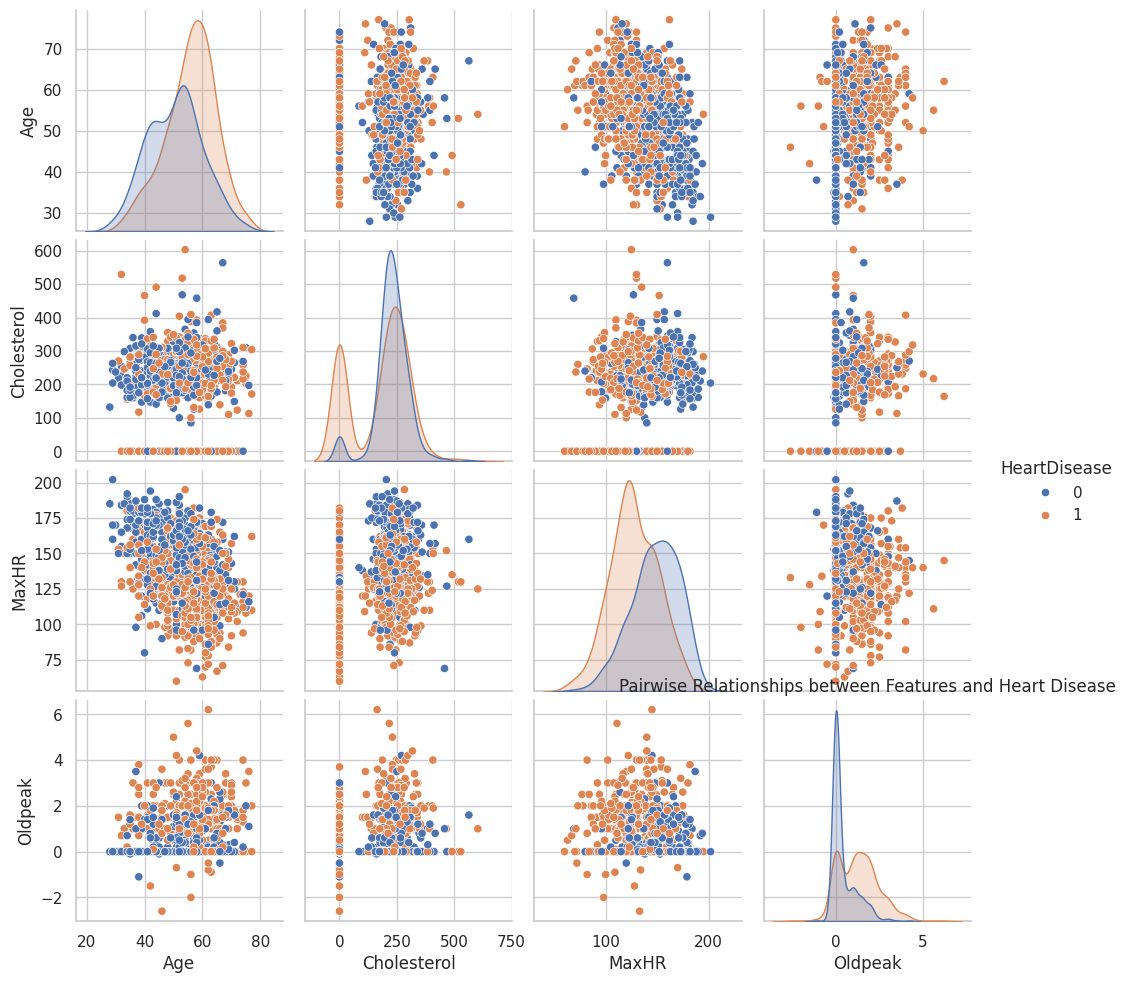

In [116]:
sns.set(style="whitegrid")
plt.figure(figsize=(18,6))
sns.pairplot(df[['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']], hue='HeartDisease')
plt.title("Pairwise Relationships between Features and Heart Disease")
plt.show()

Age:

Individuals with heart disease (orange) are mostly in the older age range (55+).

Those without heart disease (blue) show a wider spread but peak slightly younger.

Age is moderately correlated with heart disease presence.

MaxHR (Maximum Heart Rate Achieved):

Patients without heart disease generally achieve higher max heart rates.

Heart disease cases tend to cluster at lower MaxHR values, showing this may be a limiting factor.

Oldpeak (ST depression induced by exercise):

Clearly higher in patients with heart disease.

People without heart disease mostly have Oldpeak close to 0.

This feature shows a strong visual separation.

Cholesterol:

Both groups have overlapping distributions.

Some extreme outliers in the heart disease group, but not a strong visual pattern.

Alone, cholesterol may not be a strong predictor.

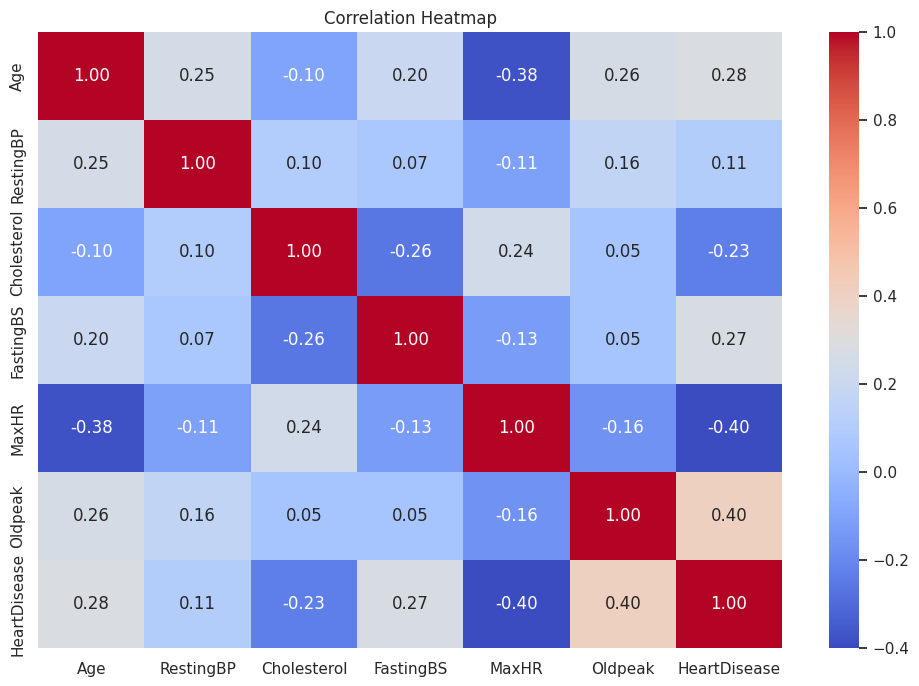

In [117]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


MaxHR (-0.40): There's a moderate negative correlation between Maximum Heart Rate and Heart Disease, meaning lower MaxHR is associated with higher heart disease risk.

Oldpeak (0.40): A moderate positive correlation—higher ST depression values (Oldpeak) are linked with a higher likelihood of heart disease.

FastingBS (0.27) and Age (0.28): Mild positive correlation with heart disease. Older age and elevated fasting blood sugar slightly increase the risk.

Cholesterol (-0.23): Surprisingly shows a mild negative correlation with heart disease in this dataset, possibly due to treated patients or outliers.

RestingBP (0.11): Very weak positive correlation—resting blood pressure doesn’t strongly predict heart disease in this data.

MaxHR and Oldpeak are the most relevant features in predicting heart disease from the given numeric variables, followed by Age and FastingBS.

FEATURE SELECTION

In [118]:
# Encode Categorical Columns
label_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
le = LabelEncoder()

# First, encode these in the original df before get_dummies
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Then apply get_dummies to remaining categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

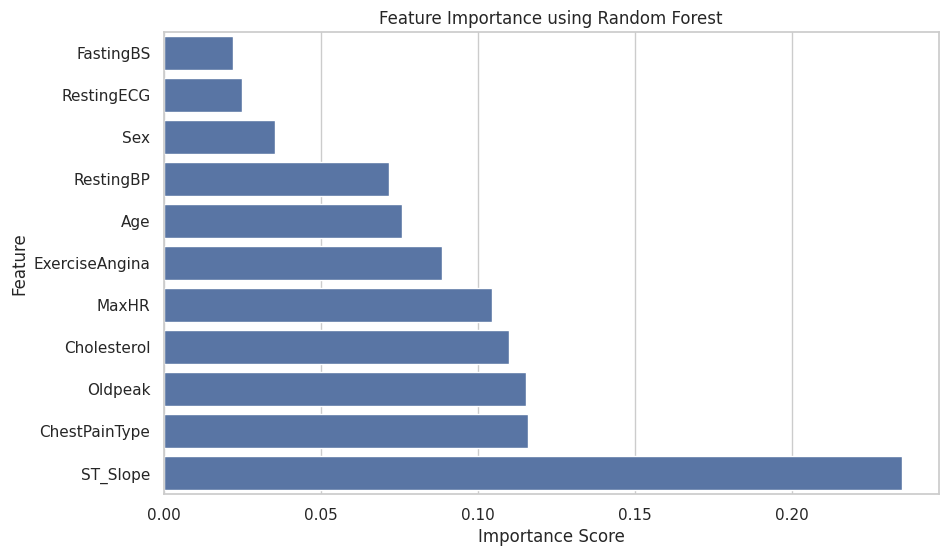

In [119]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Feature Importance using Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


The most important features in predicting heart disease were:

Oldpeak: ST depression induced by exercise is the strongest predictor.

ChestPainType: Type of chest pain carries significant predictive value.

MaxHR: Lower maximum heart rate is often associated with heart disease.

ST_Slope: The slope of the ST segment also strongly differentiates between classes.

Age: Older patients have a higher chance of heart disease.

Less important features included:

RestingECG and FastingBS, which contributed less to model decisions.

Cholesterol and RestingBP, which showed weak correlation in earlier EDA and again ranked low in importance.

In [120]:
# Scale numeric features to make them non-negative
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Drop target and prepare features
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Apply SelectKBest
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X, y)

# Get selected feature names
selected_columns = X.columns[selector.get_support()]
print("Top features selected:", selected_columns.tolist())



Top features selected: ['Age', 'Sex', 'ChestPainType', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


MODEL BUILDING

In [121]:
#  Use selected features from SelectKBest
X_selected = X[selected_columns]
y = df_encoded['HeartDisease']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)  # Cleaned: no warning

# Train models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

MODEL EVALUATION


🔷 Logistic Regression
Accuracy: 0.8587
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        77
           1       0.92      0.83      0.87       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



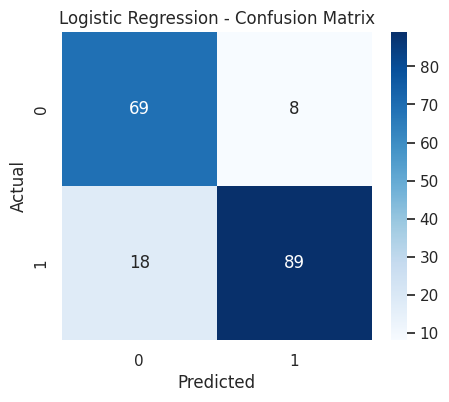


🔷 Random Forest
Accuracy: 0.8859
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.92      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



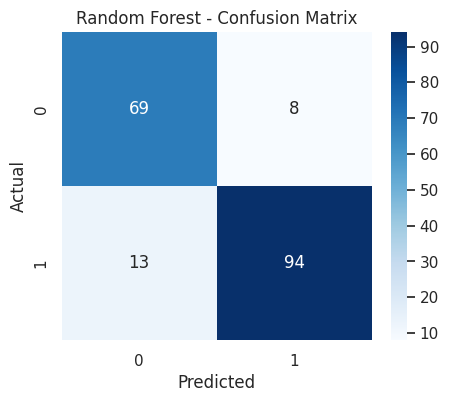


🔷 XGBoost
Accuracy: 0.8696
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        77
           1       0.93      0.84      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.87      0.87       184



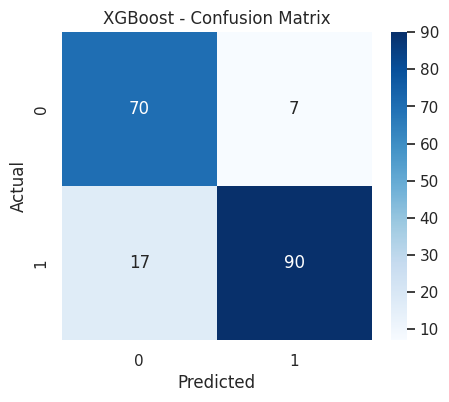

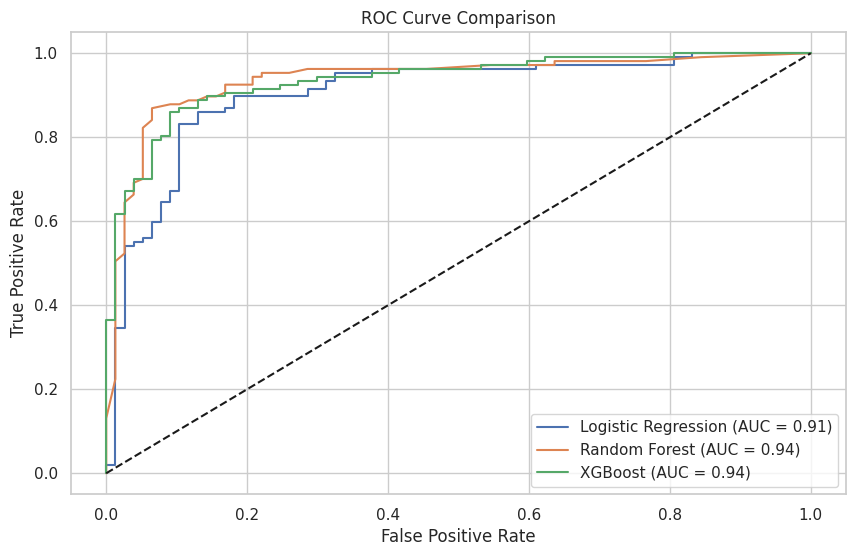

In [122]:
# Create dictionary to store models
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf
}

# 📊 Evaluate each model
for name, model in models.items():
    print(f"\n🔷 {name}")

    # Predict on test set
    y_pred = model.predict(X_test)

    # Accuracy & Classification Report
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 📈 ROC Curve for all models
plt.figure(figsize=(10, 6))

for name, model in models.items():
    # Get predicted probabilities
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# ROC Curve Styling
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


| Model                   | Accuracy   | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
| ----------------------- | ---------- | ------------------- | ---------------- | ------------------ |
| **Logistic Regression** | 0.8587     | 0.92                | 0.83             | 0.87               |
| **Random Forest**       | **0.8859** | 0.92                | **0.88**         | **0.90**           |
| **XGBoost**             | 0.8696     | **0.93**            | 0.84             | 0.88               |

Random Forest performs the best overall, with the highest accuracy (88.6%) and strong precision-recall balance.

XGBoost gives slightly higher precision for predicting heart disease (class 1), meaning it's very good at identifying true positives.

Logistic Regression is slightly behind the others in recall, meaning it misses more actual heart disease cases than RF or XGBoost.

ROC CURVE COMPARISISON
Random Forest and XGBoost slightly outperform Logistic Regression in terms of AUC.

All three models perform very well, with AUC > 0.90, indicating excellent classification performance.

XGBoost and Random Forest are especially effective in minimizing false positives while maximizing true positives — critical in heart disease detection.

Logistic Regression, while simpler, still performs strongly and could be preferred when interpretability and lower computational cost are important.

/tmp/ipython-input-123-4025629719.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


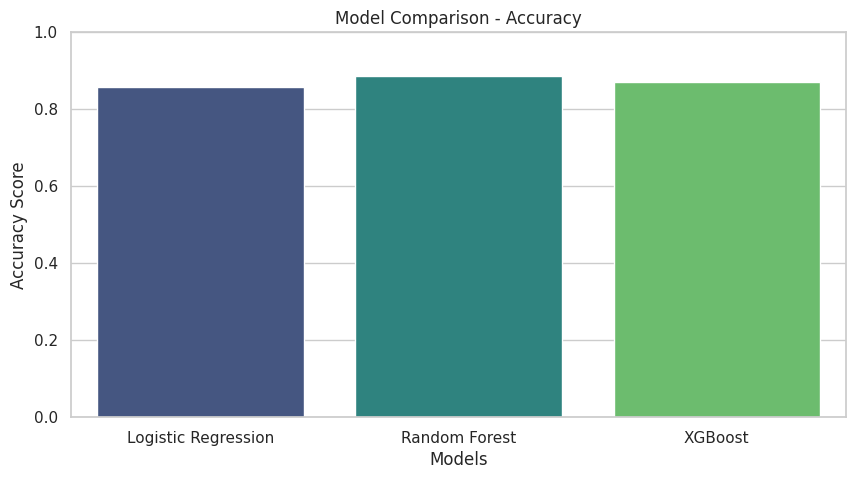

/tmp/ipython-input-123-4025629719.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=auc_scores, palette="mako")


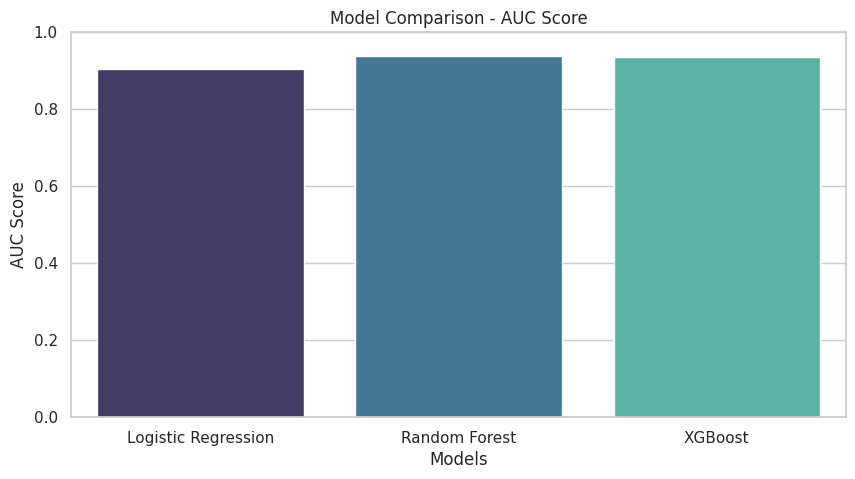

In [123]:
# Empty lists to store scores
model_names = []
accuracies = []
auc_scores = []

# Loop through each model to collect scores
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)
    auc = roc_auc_score(y_test, y_proba)
    auc_scores.append(auc)

    model_names.append(name)

# 🔷 Bar Plot for Accuracy
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.ylim(0, 1)
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy Score")
plt.xlabel("Models")
plt.show()

# 🔷 Bar Plot for AUC
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=auc_scores, palette="mako")
plt.ylim(0, 1)
plt.title("Model Comparison - AUC Score")
plt.ylabel("AUC Score")
plt.xlabel("Models")
plt.show()


THE graph shows that the Accuracy of the Random forest model is better than other models and in AUC SCORE we can see that the random forest and XGBoost are identical while the Logistic Regression is little lower . This also confirm our previous insights

 CONCLUSION
  Predictive Analysis of Heart Disease
 Model Performance Summary
Model	Accuracy	Precision	Recall	F1-Score	AUC
Logistic Regression	85.87%	0.92 (1)	0.83	0.87	0.91
Random Forest	88.59%	0.92 (1)	0.88	0.90	0.94
XGBoost	86.96%	0.93 (1)	0.84	0.88	0.94

🔹 All models achieved high performance with AUC > 0.90, indicating strong ability to distinguish between patients with and without heart disease.

🔹 Random Forest and XGBoost performed slightly better than Logistic Regression, particularly in Recall and AUC, making them excellent choices for this task.

 Top Features Identified (via Chi-Square & Random Forest Importance)
The most influential features associated with heart disease prediction were:

Oldpeak – Depression induced by exercise: higher values are strongly linked with heart disease.

ST_Slope – 'Flat' and 'Down' slopes are significantly more frequent in heart disease cases.

ChestPainType – Atypical and non-anginal pain types correlate with heart disease presence.

MaxHR (Maximum Heart Rate Achieved) – Lower values tend to be associated with heart disease.

ExerciseAngina – Presence of exercise-induced angina is a strong indicator.

RestingECG – Variations in resting ECG have predictive power.

Age – Older patients are slightly more likely to have heart disease.

Cholesterol – No strong separation alone, but contributes in combination with other features.

🔍ST_Slope and Oldpeak together showed a strong relationship with heart disease, supported visually in box plots and bar graphs.
 Categorical features like ChestPainType and ExerciseAngina were critical in improving prediction accuracy.

 Final Thoughts
Random Forest and XGBoost are recommended for deployment if computational resources allow.

Logistic Regression is still effective and suitable when model simplicity and interpretability are preferred.

The model can be enhanced further with hyperparameter tuning, cross-validation, and possibly including more patient-level data (e.g., smoking status, diabetes history).